In [21]:
import numpy as np
import matplotlib.pyplot as plt
from myAudioProcessingLib import *

In [80]:
SOUND_PATH = "sounds/"
SOUND_FILE = "train.wav"

# Get amostragem (x[n]) e frequência
x, fs = audioread(SOUND_PATH + SOUND_FILE)

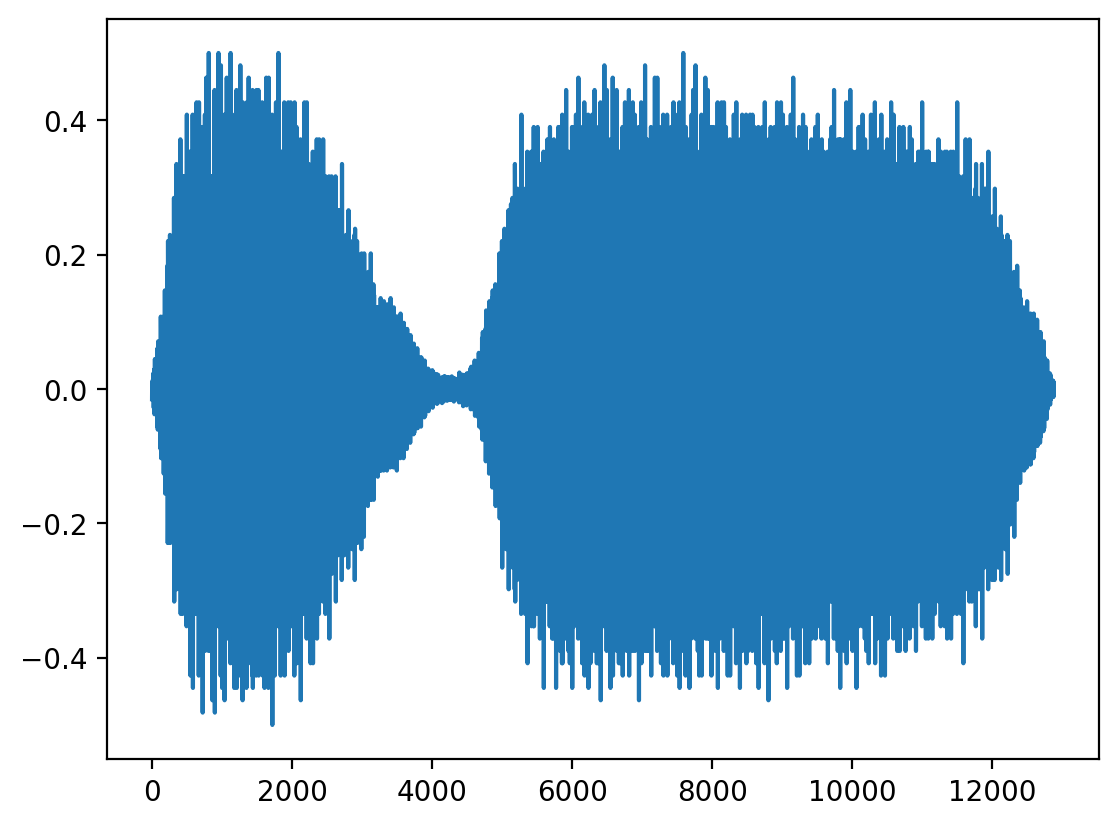

In [39]:
plt.plot(x)

In [4]:
play(x, fs)

In [5]:
# Ao diminuir frequência o periodo aumenta
play(x, fs/4.0)

In [145]:
def DFT_v1(x):
    N = len(x)

    X = np.zeros(N)
    n = np.arange(N)

    for k in np.arange(N):
        # n, k = 0, 1, ..., N - 1
        w_k = np.exp(-1j* (2 * np.pi / N) * n * k) 
        # @ - operação matricial
        X[k] += w_k.T @ x
    
    return X

/tmp/ipykernel_8235/3656439546.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  X[k] += w_k.T @ x


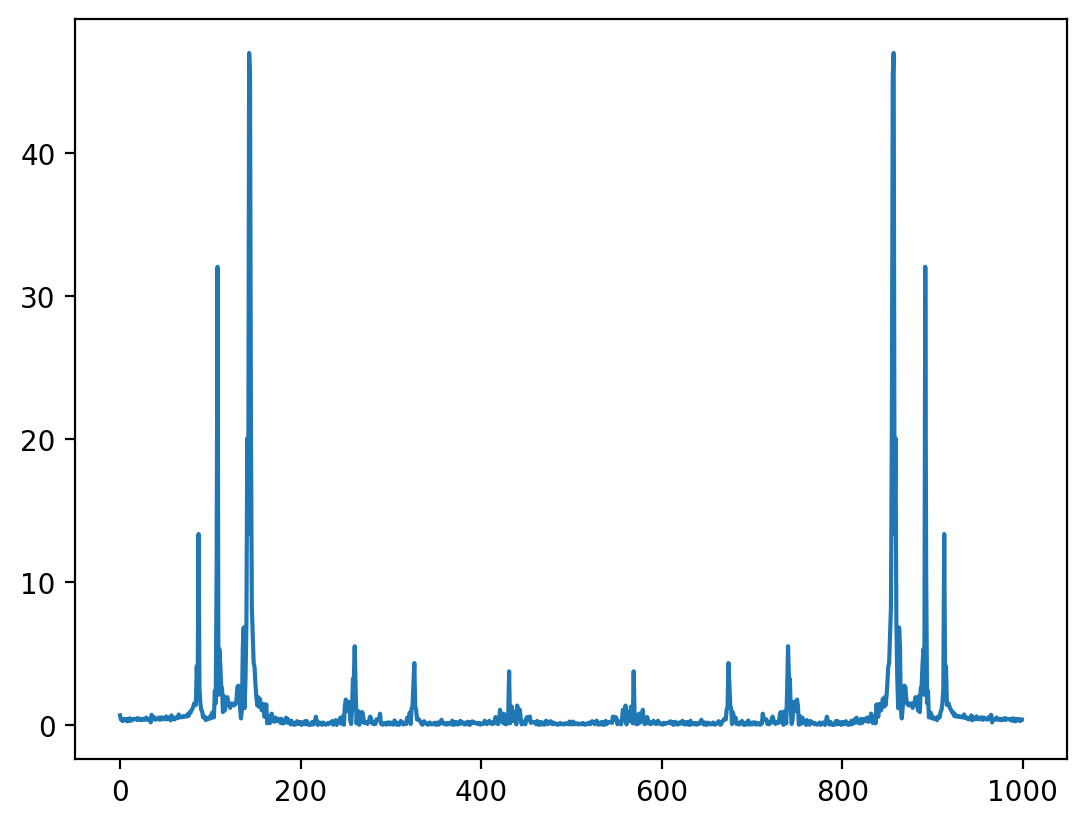

In [87]:
X_v1 = DFT_v1(x[:1000])
Xmag_v1 = np.abs(X_v1)
plt.plot(Xmag_v1)

In [151]:
def DFT_v2(x):
    N = len(x)
    n = np.expand_dims(np.arange(N), 1)

    W = np.exp(-1j * (2 * np.pi / N) * n @ n.T)
    X = W @ x

    return X


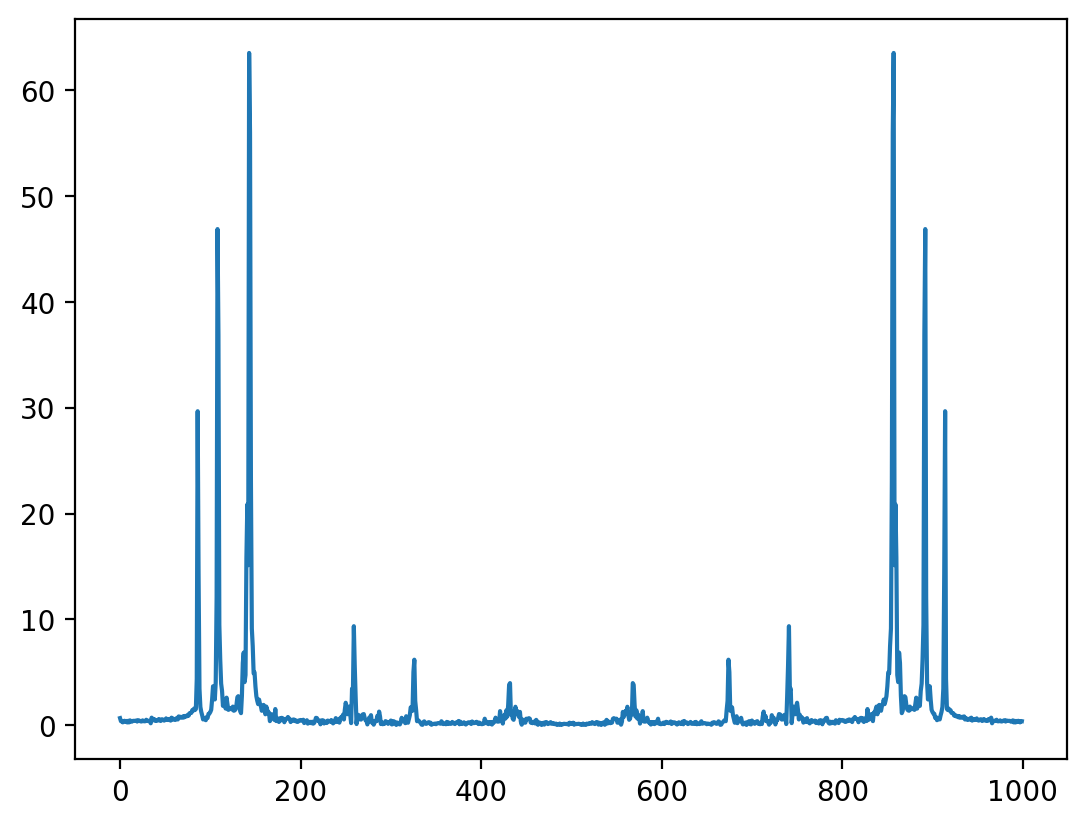

In [126]:
X_v2 = DFT_v2(x[:1000])
Xmag_v2 = np.abs(X_v2)
plt.plot(Xmag_v2)

In [73]:
def DFT_v3(x):
    N = len(x)

    X = np.zeros(N, dtype='complex')
    for k in np.arange(N):
        for n in np.arange(N):
            X[k] += x[n] * np.exp(-1j*(2*np.pi/N)*n*k)
    
    return X

def synthesis_formula_v3(X):
    N = len(X)

    x = np.zeros(N, dtype='complex')
    for n in np.arange(N):
        for k in np.arange(N):
            x[n] += (1/N) * X[k] * np.exp(1j * (2 * np.pi / N) * n * k)
    
    return x

In [54]:
X = DFT_v3(x[:1000])


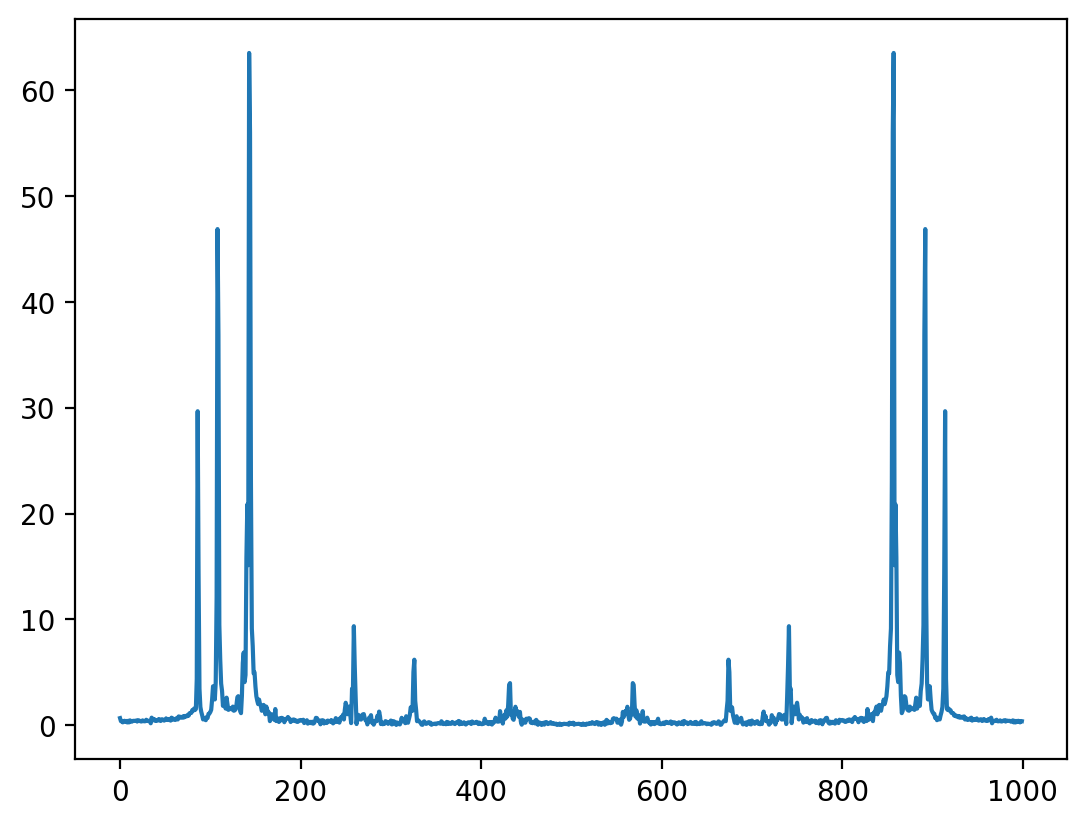

In [55]:
Xmag = np.abs(X)
plt.plot(Xmag)

In [49]:
x = synthesis_formula_v3(X)

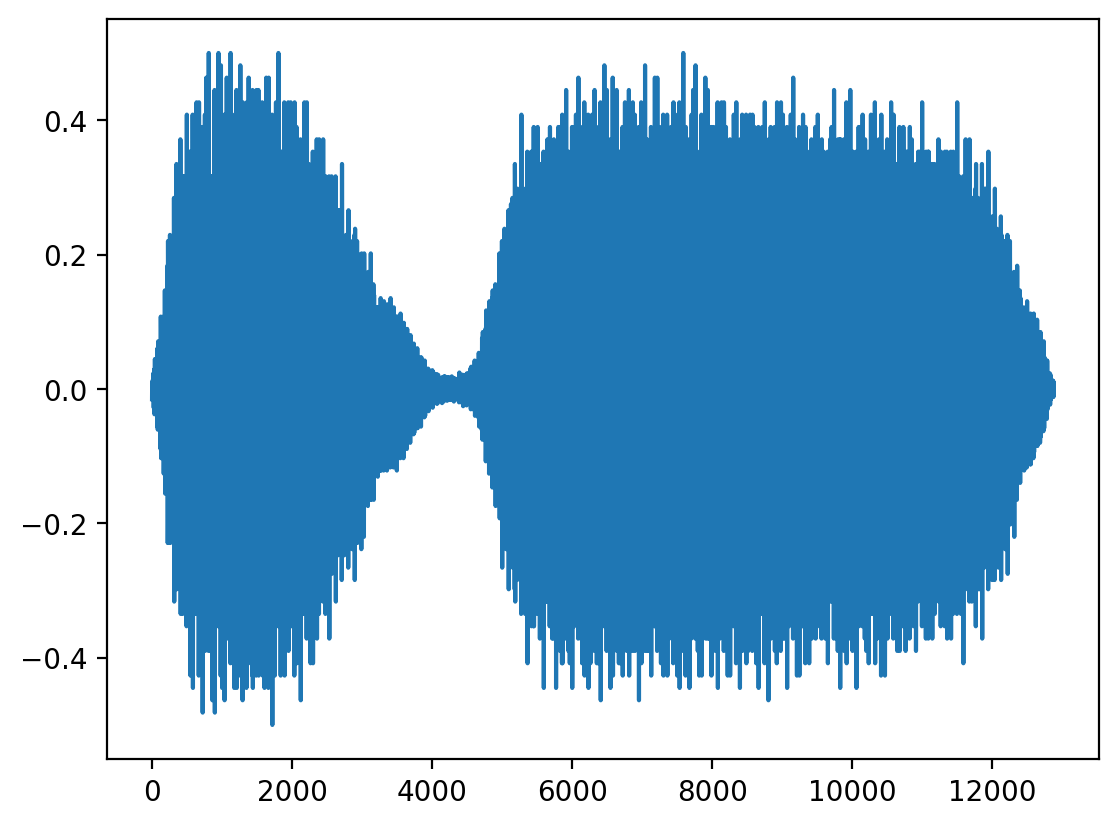

In [56]:
xmag = np.abs(x)
plt.plot(x)